<figure>
<center>
<img style="-webkit-user-select: none;margin: auto;background-color: hsl(0, 0%, 90%);transition: background-color 300ms;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1526px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png" width="100" height="140" >



</center>
</figure>


# Problema

One Drive no admite que los archivos y carpetas tengan algunos caracteres, si poseen una gran cantidad de archivos se puede hacer tediosa la labor de modificar cada archivo. Por lo tanto, este programa permite conectarse a Google Drive y renombrar todos los archivos que generan conflicto.

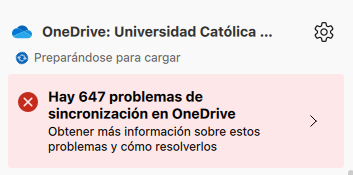

# Instalamos lo necesario y conectamos a Google Drive:

In [4]:
import os
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Definimos la ruta y los caracteres invalidos
Si se desea especificar una carpeta especifica, pueden incorporar la ruta con "/". Ejemplo:

`FICHERO = "/content/drive/MyDrive/mi_carpeta1/mi_carpeta2"`

In [41]:
FICHERO = "/content/drive/MyDrive"

# Lista de caracteres que OneDrive no permite en sus nombres de archivo.
INVALID_CHARACTERS = ["*", "+", "\\", "/", ":", "?", "\"", ">", "<", "^", "|", "á", "é", "í", "ó", "ú", " .", "  "]
# Se pueden incorporar mas caracteres, sin embargo estos son opcionales.
# Pueden usar este ejemplo:
# INVALID_CHARACTERS = ["*","\'", "~", "&", ";", "¿", "=", "%", "#", "º", "º", "+", "\\", "/", ":", "?", "\"", ">", "<", "^", "|", "  "]

# Ejecutamos el programa

In [49]:
def recursive_replace(name: str, search: str, replace: str) -> str:
    """ remplaza todos los caracteres hasta que no quede ninguno"""
    if search == " .": # Caso puntual
      replace = "."
    while search in name:
        name = name.replace(search, replace)
    return name

if __name__ == "__main__":
    n = 0
    for archivo in Path(FICHERO).glob("**/*"):   
        # revisamos si los elementos de INVALID_CHARACTERS estan en archivo.name
        if any(x in archivo.name for x in INVALID_CHARACTERS) or archivo.name[0] == " " or archivo.name[-1] == " ":
            new_name = archivo.name
            # Casos donde comienza o termina con espacios
            while new_name[0] == " ":
                new_name = new_name[1:]
            while new_name[::-1][0] == " ":
                new_name= new_name[:-1]
            # Casos de los caracteres invalidos
            for invalid in INVALID_CHARACTERS:
                new_name = recursive_replace(new_name, invalid, "")
            new_file = archivo.with_name(new_name)
            # cambiamos de nombre en el sistema
            os.rename(archivo, new_file)
            print(f"Modificado: {archivo.name}")
            n += 1
    print(f"\nCompletado: {n} elementos modificados.")


Completado: 0 elementos modificados.
